# Homework 1

#### EE-556 Mathematics of Data - Fall 2024

In this homework, we consider a binary classification task that we will model using logistic regression. Your goal will be to find a classifier using first-order methods and accelerated gradient descent methods. The first part will consist of more theoretical questions, and the second one will ask you to implement these methods.

<div class="alert alert-info">
  ℹ️ <strong>Information on group based work:</strong>
</div>

- You are to deliver only 1 notebook per group.
- Asking assistance beyond your group is ok, but answers should be individual to the group.
- In the event that there was <span style="color: red;">disproportional work done</span> by different group members, let the TAs know.

<div style="border: 1px solid #f00; background-color: #fdd; padding: 10px; border-radius: 5px;">
  ⚠️ Do not forget: Write who are the people in your group as well as their respective SCIPER numbers
</div>

Person 1 **Name**: || Person 1 **SCIPER**:


Person 2 **Name**: || Person 2 **SCIPER**:


Person 3 **Name**: || Person 3 **SCIPER**:

## 1. Logistic Regression - 15 Points

Logistic regression is a classic approach to _binary classification_. Before we dive in, let us first define the standard logistic function $\sigma$ on which most of what follows is built:

\begin{equation*}
    \sigma : x \mapsto \frac{1}{1 + \exp{(-x)}}.
\end{equation*}

In logistic regression, we model the _conditional probability_ of observing a class label $b$ given a set of features $\mathbf{a}$. More formally, if we observe $n$ independent samples

\begin{equation*}
    \{(\mathbf{a}_i,b_i)\}_{i=1}^n,
\end{equation*}

where $\mathbf{a}_i\in\mathbb{R}^p$ and $b_i\in\{-1, +1\}$ is the class label, we _assume_ that $b_i$ given $\mathbf{a}_i$ is a symmetric Bernouilli random variable with parameter $\sigma(\mathbf{a}_i^T\mathbf{x}^\natural)$, for some unknown $\mathbf{x}^\natural \in \mathbb{R}^p$. In other words, we assume that there exists an $\mathbf{x}^\natural \in \mathbb{R}^p$ such that

\begin{equation*}
    \mathbb{P}(b_i = 1 \mid \mathbf{a}_i) = \sigma(\mathbf{a}_i^T\mathbf{x}^\natural) \quad \text{ and } \quad \mathbb{P}(b_i = -1 \mid \mathbf{a}_i) = 1 - \sigma(\mathbf{a}_i^T\mathbf{x}^\natural)=  \sigma( - \mathbf{a}_i^T\mathbf{x}^\natural).
\end{equation*}

This is our statistical model. It can be written in a more compact form as follows,

\begin{equation*}
    \mathbb{P}(b_i = j \mid \mathbf{a}_i) = \sigma(j \cdot \mathbf{a}_i^T\mathbf{x}^\natural), \quad j \in \{+1, -1\}.
\end{equation*}

Our goal now is to determine the unknown $\mathbf{x}^\natural$ by constructing an estimator.

__(a)__ (1 point) We are provided with a set of $n$ independent observations. Show that the negative log-likelihood $f$ can be written as:

\begin{equation*}
	\begin{aligned}
		f(\mathbf{x}) = -\log(\mathbb{P}(b_1, \dots, b_n | a_1, \dots, a_n)) & = \sum_{i=1}^n  \log(1 + \exp(- b_i \mathbf{a}_i^T\mathbf{x})).
	\end{aligned}
\end{equation*}


ANSWER : We start by considering a single observation, that is the likelihood of observing the class labels $b_i$ given the features $\mathbf{a}_i$. The probability of observing $b_i$ given $\mathbf{a}_i$ is:

$$
\mathbb{P}(b_i \mid \mathbf{a}_i) = \sigma(b_i \cdot \mathbf{a}_i^T \mathbf{x}^\natural) = \frac{1}{1 + \exp(- b_i \cdot \mathbf{a}_i^T \mathbf{x}^\natural)}
$$

Since the observations are independent, the joint likelihood of observing all $n$ samples is the product of the individual likelihoods:

$$
\mathbb{P}(b_1, \dots, b_n \mid \mathbf{a}_1, \dots, \mathbf{a}_n) = \prod_{i=1}^n \mathbb{P}(b_i \mid \mathbf{a}_i) = \prod_{i=1}^n \frac{1}{1 + \exp(- b_i \cdot \mathbf{a}_i^T \mathbf{x}^\natural)}.
$$

Then, by applying the rules of calculus we get the following:



$$
f(\mathbf{x}) = -\log\left( \prod_{i=1}^n \frac{1}{1 + \exp(- b_i \cdot \mathbf{a}_i^T \mathbf{x}^\natural)} \right) = -\sum_{i=1}^n \log\left( \frac{1}{1 + \exp(- b_i \cdot \mathbf{a}_i^T \mathbf{x}^\natural)} \right) = \sum_{i=1}^n \log(1 + \exp(- b_i \cdot \mathbf{a}_i^T \mathbf{x}^\natural)).
$$



__(b)__ (2 point) Show that the function $u \mapsto \log(1 + \exp(-u))$ is convex. Deduce that $f$ is convex.

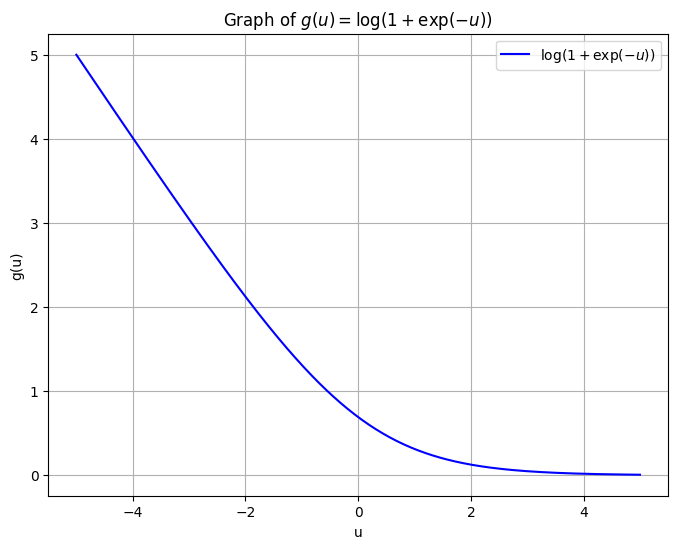

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def g(u):
    return np.log(1 + np.exp(-u))

# Generate values for u
u_values = np.linspace(-5, 5, 400)
g_values = g(u_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(u_values, g_values, label=r'$\log(1 + \exp(-u))$', color='blue')
plt.title(r'Graph of $g(u) = \log(1 + \exp(-u))$')
plt.xlabel('u')
plt.ylabel('g(u)')
plt.grid(True)
plt.legend()
plt.show()


From the drawing, we can directly conclude that this is a convex function. If we take the function $f$, each term in the summation, $\log(1 + \exp(- b_i \mathbf{a}_i^T \mathbf{x}))$, is a composition of the convex function $g(u) = \log(1 + \exp(-u))$ with the linear function $u = b_i \mathbf{a}_i^T \mathbf{x}$. Since the composition of a convex function with a linear function is convex, each term in the summation is convex. The sum of convex functions is also convex. Therefore, $f(\mathbf{x})$ is convex.

For a more formal demonstration:

The second derivative of $\log(1 + \exp(-u))$ gives $\frac{\exp(-u)}{(1 + \exp(-u))^2}$ and the second derivative is positive so, by the definition given by the course (lecture 3, page 28), the function $\log(1 + \exp(-u))$ is convex. It follows that $\log(1 + \exp(- b_i \mathbf{a}_i^T\mathbf{x}))$ is convex and knowing that the sum of convex functions gives a convex functions, we proved that $f$ is convex.

You have just established that the negative log-likelihood is a convex function. So in principle, any local minimum of the maximum likelihood estimator, which is defined as

\begin{equation*}
    \mathbf{x}^\star_{ML} = \arg\min_{\mathbf{x} \in \mathbb{R}^p} f(\mathbf{x}),
\end{equation*}

is a global minimum so it can serve as an estimator of $\mathbf{x}^\natural$. But, does the minimum always exist? We will ponder this question in the following three points.

__(c)__ (1 point) Explain the difference between infima and minima.  Give an example of a convex function, defined over $\mathbb{R}$, that does not attain its infimum. 

ANSWER : The infimum of a function over a domain is the greatest lower bound of the function's values over that domain (it may or may not be an element of the set itself), while the minimum is the smallest value the function actually attains within that domain, if it exists.

Consider the function $f(x) = \exp(x)$, which is defined over $\mathbb{R}$. This function is convex because its second derivative is positive for all $x \in \mathbb{R}$: $f''(x) = \exp(x) > 0 $.

However, the function does not attain its infimum over $\mathbb{R}$. The infimum of $f(x)$ over $\mathbb{R}$ is 0, because $\exp(x) > 0$ for all $x \in \mathbb{R}$ and $\exp(x)$ can get arbitrarily close to 0 as $x \to -\infty$. But there is no $x \in \mathbb{R}$ such that $\exp(x) = 0$. Therefore, the infimum is not in the set.


__(d)__ (1 point) Let us assume that there exists $\mathbf{x}_0 \in \mathbb{R}^p$ such that 

\begin{equation*}
    \forall i\in\{1, \dots, n\}, \quad \quad b_i \mathbf{a}_i^T\mathbf{x}_0 > 0.
\end{equation*}

This is called _complete separation_ in the literature. Can you think of a geometric reason why this name is appropriate? Think of a 2D example where this can happen (i.e $p=2$) and describe why _complete separation_ is an appropriate name.



ANSWER : The term "**complete separation**" is appropriate because it describes a situation where the data points belonging to different classes can be perfectly separated by a hyperplane. In other words, there exists a vector $\mathbf{x}_0$ such that the dot product $b_i \mathbf{a}_i^T \mathbf{x}_0$ is positive for all data points $(\mathbf{a}_i, b_i)$.

From this, you should see that it is likely that our data satisfies the complete separation assumption. Unfortunately, as you will show in the following question, this can become an obstacle.

__(e)__ (1 point) In a _complete separation_ setting, i.e, there exists $\mathbf{x}_0$ such that 

\begin{equation*}
    \forall i\in\{1, \dots, n\}, \quad \quad b_i \mathbf{a}_i^T\mathbf{x}_0 > 0,
\end{equation*}

prove that the function $f$ does not attain its minimum. 

__Hint__: If the function did have a minimum, would it be above, below or equal to zero? Then think of how $f(2 \mathbf{x}_0)$ compares with $f(\mathbf{x}_0)$, how about $f(\alpha \mathbf{x}_0)$ for $\alpha \rightarrow + \infty$ ? 

ANSWER : We assume the function $f$ attains its minimum at some point $\mathbf{x}^\star$:

$$
f(\mathbf{x}^\star) \leq f(\mathbf{x}) \quad \forall \mathbf{x} \in \mathbb{R}^p.
$$

In a complete separation setting, for any scalar $\alpha > 0$, we should have:

$$
b_i \mathbf{a}_i^T (\alpha \mathbf{x}_0) = \alpha (b_i \mathbf{a}_i^T \mathbf{x}_0) > 0.
$$

Goind back to our function $f$, and looking at $f(\alpha \mathbf{x}_0)$, we have :

$$
f(\alpha \mathbf{x}_0) = \sum_{i=1}^n \log(1 + \exp(- b_i \mathbf{a}_i^T (\alpha \mathbf{x}_0))).
$$

As $\alpha \to +\infty$, $\exp(-\alpha (b_i \mathbf{a}_i^T \mathbf{x}_0)) \to 0$. Therefore,

$$
f(\alpha \mathbf{x}_0) = \sum_{i=1}^n \log(1 + \exp(-\alpha (b_i \mathbf{a}_i^T \mathbf{x}_0))) \to 0 \quad \text{as} \quad \alpha \to +\infty.
$$

If $f$ attains its minimum at $\mathbf{x}^\star$, then $f(\mathbf{x}^\star)$ must be a finite value. However, we have shown that $f(\alpha \mathbf{x}_0) \to 0$ as $\alpha \to +\infty$. Since $f$ is non-negative and convex, the only way for $f$ to approach 0 is if it never attains a minimum value greater than 0. Therefore, the assumption that $f$ attains its minimum leads to a contradiction. Hence, the function $f$ does not attain its minimum in a complete separation setting.

As you have just shown convex functions do not always attain their infimum. So it is possible for the maximum-likelihood estimator $\mathbf{x}^\star_{ML}$ to not exist. We will resolve this issue by adding a regularizer. 

In what follows, we consider the function

\begin{equation*}
	f_\mu(\mathbf{x}) = f(\mathbf{x}) + \frac{\mu}{2}\|\mathbf{x}\|_2^2
\end{equation*}
with $\mu> 0$.

__(f)__ (1 point) Show that the gradient of $f_\mu$ can be expressed as 
\begin{equation}
	\nabla f_\mu(\mathbf{x}) = \sum_{i=1}^n -b_i \sigma(-b_i \cdot \mathbf{a}_i^T\mathbf{x})\mathbf{a}_i + \mu \mathbf{x}.
\tag{1}
\end{equation}
__Hint__: Lecture 3 shows you how to proceed with this question.

ANSWER : Let's calculate the gradients for both terms:

$$
\nabla f(\mathbf{x}) = \sum_{i=1}^n \nabla \log(1 + \exp(- b_i \mathbf{a}_i^T \mathbf{x})).
$$

Using the chain rule, we have:

$$
\nabla \log(1 + \exp(- b_i \mathbf{a}_i^T \mathbf{x})) = \frac{1}{1 + \exp(- b_i \mathbf{a}_i^T \mathbf{x})} \cdot (-b_i \mathbf{a}_i) \cdot \exp(- b_i \mathbf{a}_i^T \mathbf{x}) = -b_i \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) \mathbf{a}_i
$$

where we use the following : $\frac{\exp\left(-b_i \mathbf{a}_i^T \mathbf{x}\right)}{1 + \exp\left(-b_i \mathbf{a}_i^T \mathbf{x}\right)} = \sigma\left(-b_i \mathbf{a}_i^T \mathbf{x}\right)$

Then:

$$
\nabla \left( \frac{\mu}{2} \|\mathbf{x}\|_2^2 \right) = \mu \mathbf{x}.
$$

Combining the gradients we get:

$$
\nabla f_\mu(\mathbf{x}) = \sum_{i=1}^n -b_i \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) \mathbf{a}_i + \mu \mathbf{x}.
$$

__(g)__ (1 point) Show that the Hessian of $f_\mu$ can be expressed as 
\begin{equation}
	\nabla^2 f_\mu(\mathbf{x}) = \sum_{i=1}^{n} \sigma(-b_i \cdot \mathbf{a}_i^T\mathbf{x})(1 - \sigma(-b_i \cdot \mathbf{a}_i^T\mathbf{x}))\mathbf{a}_i\mathbf{a}_i^T + \mu \mathbf{I}.
\tag{2}
\end{equation}

ANSWER : The Hessian of $f(\mathbf{x})$ is:

$$
\nabla^2 f(\mathbf{x}) = \sum_{i=1}^n \nabla \left( -b_i \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) \mathbf{a}_i \right).
$$

Using the chain rule, we have:

$$
\nabla \left( -b_i \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) \mathbf{a}_i \right) = -b_i \mathbf{a}_i \nabla \left( \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) \right)^T.
$$

The gradient of $\sigma(-b_i \mathbf{a}_i^T \mathbf{x})$ is:

$$
\nabla \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) = \sigma(-b_i \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \mathbf{a}_i^T \mathbf{x}))(-b_i \mathbf{a}_i).
$$

Now we substitute this result back into the chain rule expression:

$$
\nabla \left( -b_i \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) \mathbf{a}_i \right) = -b_i \mathbf{a}_i \left( \sigma(-b_i \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \mathbf{a}_i^T \mathbf{x}))(-b_i \mathbf{a}_i) \right)^T.
$$

This simplifies to:

$$
b_i^2 \sigma(-b_i \mathbf{a}_i^T \mathbf{x}) (1 - \sigma(-b_i \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T.
$$


Therefore, the Hessian of $f(\mathbf{x})$ is:

$$
\nabla^2 f(\mathbf{x}) = \sum_{i=1}^n -b_i^2 \sigma(-b_i \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T.
$$

The Hessian of the regularization term is:

$$
\nabla^2 \left( \frac{\mu}{2} \|\mathbf{x}\|_2^2 \right) = \mu \mathbf{I}.
$$

Finally we get:

$$
\nabla^2 f_\mu(\mathbf{x}) = \sum_{i=1}^n -b_i^2 \sigma(-b_i \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T + \mu \mathbf{I}.
$$

but having $b_i^2$ is equal to 1:
$$
\nabla^2 f_\mu(\mathbf{x}) = \sum_{i=1}^n \sigma(-b_i \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T + \mu \mathbf{I}.
$$

It is convenient to observe that we can write the Hessian in a more compact form by defining the matrix
\begin{equation}
	\mathbf{A} = \begin{bmatrix}
        \leftarrow &  \mathbf{a}_1^T & \rightarrow \\
        \leftarrow &  \mathbf{a}_2^T & \rightarrow \\
         &  \ldots &  \\
        \leftarrow &  \mathbf{a}_n^T & \rightarrow \\
  \end{bmatrix}.
\end{equation}
It is easy to see that we have
\begin{equation}
	\nabla^2 f_\mu(\mathbf{x}) =  \mathbf{A}^T \text{Diag}\left(\sigma(-b_i \cdot \mathbf{a}_i^T\mathbf{x})(1 - \sigma(-b_i \cdot \mathbf{a}_i^T\mathbf{x})) \right)\mathbf{A}+ \mu \mathbf{I}.
\end{equation}


__(h)__ (1 point) Show that $f_\mu$ is $\mu$-strongly convex. 

ANSWER : From Lecture 3, a function $f_\mu$ is $\mu$-strongly convex if for all $\mathbf{x}, \mathbf{y} \in \mathbb{R}^p$, we have:

$$
f(\mathbf{y}) \geq f(\mathbf{x}) + \langle \nabla f(\mathbf{x}), \mathbf{y} - \mathbf{x} \rangle + \frac{\mu}{2} \|\mathbf{y} - \mathbf{x}\|_2^2
$$


Equivalently, $f_\mu$ is $\mu$-strongly convex if the Hessian $\nabla^2 f_\mu(\mathbf{x})$ is positive definite with the smallest eigenvalue being at least $\mu$, which can be written like $\nabla^2 f(\mathbf{x}) \succeq \mu \mathbf{I}, \quad \forall \mathbf{x} \in \mathbb{R}^p$. To show that, we write that for any vector $\mathbf{x}$, we have $\mathbf{x}^T\mathbf{A}^T \mathbf{A}\mathbf{x}= (\mathbf{A}\mathbf{x})^T(\mathbf{A}\mathbf{x}) = \sum_{i=1}^{n} (\mathbf{a}_i^T\mathbf{x})^2 \geq 0 $, which means that $\mathbf{A}^T \mathbf{A}$ is positive semidefinite.

From the cell above, the term $\mathbf{A}^T \text{Diag}\left(\sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})) \right) \mathbf{A}$ is a positive semidefinite matrix the diagonal matrix has non-negative entries (since $\sigma(u)(1 - \sigma(u)) \geq 0$ for all $u$).

The term $\mu \mathbf{I}$ is a positive definite matrix with the smallest eigenvalue being $\mu$. Therefore, the Hessian is positive definite with the smallest eigenvalue being at least $\mu$.



__(i)__ (3 points) Is it possible for a strongly convex function to not attain its minimum ? <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) Justify your reasoning.

ANSWER: Strictly said the answer is yes. It is possible to find a function that is strongly convex while not attaining its minimum, when the function is lower semi-continous and its domain is a subset of  $\mathbb{R^n}$. We did not come up with this, but found a post about it on a [forum](https://math.stackexchange.com/questions/2311335/existence-of-minimizer-for-strongly-convex-function-on-closed-convex-set).

We will prove that the function $f: [0, \infty] \to \mathbb{R}$,

$$
f(x) =
\begin{cases} 
1 & \text{when } x = 0 \\
x^2 & \text{when } x > 0
\end{cases}
$$

is 2-strongly convex based on the definition of strong convexity, while not attaining its minimum.

#### 1. Definition of Strong Convexity

A function $f: \mathcal{Q} \to \mathbb{R} \cup \{ + \infty \} $ , where $ \mathcal{Q} \subseteq \mathbb{R}^p$, is said to be $\mu$-strongly convex if and only if for all $\mathbf{x}, \mathbf{y} \in \mathcal{Q}$ and $\alpha \in [0, 1]$, the following inequality holds:

$$
f(\alpha \mathbf{x} + (1 - \alpha) \mathbf{y}) \leq \alpha f(\mathbf{x}) + (1 - \alpha) f(\mathbf{y}) - \frac{\mu}{2} \alpha(1 - \alpha) \| \mathbf{x} - \mathbf{y} \|_2^2
$$

We will verify that this inequality holds for the given function.

#### 2. Check strong convexity for the given function:

Case 1: $x = 0$ and $y > 0$
- For $x = 0$, we have $f(0) = 1$
- For $y > 0$, we have $f(y) = y^2$

The inequality becomes:
$$
f(\alpha \cdot 0 + (1 - \alpha) y) \leq \alpha f(0) + (1 - \alpha) f(y) - \frac{\mu}{2} \alpha(1 - \alpha) \| 0 - y \|_2^2 \\
$$

This can futher be simplified,
$$
\begin{align*}
\Leftrightarrow (1 - \alpha)^2 y^2 &\leq \alpha + (1 - \alpha) y^2 - \frac{\mu}{2} \alpha(1 - \alpha) y^2 \\
\Leftrightarrow (1 - 2\alpha + \alpha^2) y^2 &\leq \alpha + (1 - \alpha) y^2 - \frac{\mu}{2} (\alpha - \alpha^2) y^2 \\
\Leftrightarrow \alpha^2 \left( 1 - \frac{\mu}{2} \right) y^2 &\leq \alpha + \alpha \left( 1 - \frac{\mu}{2} \right) y^2
\end{align*}
$$
and since $\alpha \in [0, 1]$ this inequality always holds.


Case 2: $x > 0$ and $y > 0$

This just comes down to proving  that the function $x^2$ for $x > 0$ is 2-strongly convex. Which by the definition of strong convexity in lecture 3, slide 37 is the true. As,
$$
h(x) = f(x) - \frac{\mu}{2} \|\mathbf{x}\|_2^2 = x^2 - \frac{2}{2} x^2 = 0
$$
which is a convex function.


#### 3. Conclusion

From the cases above, we can conclude that the function $ f(x) $ is 2-strongly convex. However, the function does **not attain its minimum** because the minimum value would occur as $ x \to 0^+ $, and at $ x = 0 $, $ f(0) = 1 $, which is greater than $ f(x) = x^2 $ for small $ x > 0 $. Hence, the function is strongly convex but does not attain its minimum.


We will now show that $f_\mu$ is smooth, i.e, $\nabla f_\mu$ is L-Lipschitz with respect to the Euclidean norm, with 
\begin{equation}
	L = \|A\|^2_F + \mu \text{, where }\|\cdot\|_F\text{ denotes the Frobenius norm. }
\end{equation}

(1 point for all three questions)

__(j-1)__ Show that $\lambda_{\max}(\mathbf{a}_i\mathbf{a}_i^T) = \left\| \mathbf{a}_i\right\|_2^2$, where $\lambda_{\max}(\cdot)$ denotes the largest eigenvalue.

ANSWER : Consider the matrix $\mathbf{a}_i \mathbf{a}_i^T$, where $\mathbf{a}_i \in \mathbb{R}^p$. This matrix is a rank-1 matrix because it is formed by the outer product of the vector $\mathbf{a}_i$ with itself. The eigenvalues of a rank-1 matrix can be found the following way:

$$
\mathbf{a}_i \mathbf{a}_i^T \mathbf{v} = \lambda \mathbf{v}.
$$

where $\mathbf{v}$ is an eigenvector of $\mathbf{a}_i \mathbf{a}_i^T$ with eigenvalue $\lambda$. Consider now the characteristic equation:

$$
\det(\mathbf{a}_i \mathbf{a}_i^T - \lambda \mathbf{I}) = 0.
$$

Since $\mathbf{a}_i \mathbf{a}_i^T$ is a rank-1 matrix, it has at most one non-zero eigenvalue. The other eigenvalues are zero. The non-zero eigenvalue can be found by considering the trace of the matrix:

$$
\text{Tr}(\mathbf{a}_i \mathbf{a}_i^T) = \mathbf{a}_i^T \mathbf{a}_i = \left\| \mathbf{a}_i \right\|_2^2.
$$

Therefore the non-zero eigenvalue must be $\left\| \mathbf{a}_i \right\|_2^2$.


__(j-2)__ Using [2](#mjx-eqn-eq2), show that $\lambda_{\max}(\nabla^2 f_\mu(\mathbf{x})) \leq \sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu$. 

__Hint__: Recall that $\lambda_{\max}(\cdot)$ verifies the triangle inequality.

ANSWER : From part (g), we have the Hessian of $f_\mu$ expressed as:

$$
\nabla^2 f_\mu(\mathbf{x}) = \sum_{i=1}^{n} \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T + \mu \mathbf{I}.
$$

We need to find an upper bound for $\lambda_{\max}(\nabla^2 f_\mu(\mathbf{x}))$. The following hint is given, for any matrices $\mathbf{A}$ and $\mathbf{B}$, we have:

$$
\lambda_{\max}(\mathbf{A} + \mathbf{B}) \leq \lambda_{\max}(\mathbf{A}) + \lambda_{\max}(\mathbf{B}).
$$

Applying the triangle inequality to the Hessian of $f_\mu$, we get:

$$
\lambda_{\max}(\nabla^2 f_\mu(\mathbf{x})) \leq \sum_{i=1}^{n} \lambda_{\max}\left( \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T \right) + \lambda_{\max}(\mu \mathbf{I}).
$$


Note that $\sigma(u)(1 - \sigma(u)) \leq \frac{1}{4}$ for all $u$, since $\sigma(u) \in [0, 1]$ : 
$$
\lambda_{\max}\left( \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T \right) \leq \frac{1}{4} \lambda_{\max}(\mathbf{a}_i \mathbf{a}_i^T).
$$

From part (j-1), we know that $\lambda_{\max}(\mathbf{a}_i \mathbf{a}_i^T) = \|\mathbf{a}_i\|_2^2$.

$$
\lambda_{\max}\left( \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})(1 - \sigma(-b_i \cdot \mathbf{a}_i^T \mathbf{x})) \mathbf{a}_i \mathbf{a}_i^T \right) \leq \frac{1}{4} \|\mathbf{a}_i\|_2^2.
$$

For the term $\mu \mathbf{I}$, we have $\lambda_{\max}(\mu \mathbf{I}) = \mu$.

So we get:

$$
\lambda_{\max}(\nabla^2 f_\mu(\mathbf{x})) \leq \sum_{i=1}^{n} \frac{1}{4} \|\mathbf{a}_i\|_2^2 + \mu \leq \sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu..
$$

__(j-3)__ Conclude that $f_\mu$ is $L$-smooth for $L = \|A\|_F^2 + \mu$.

ANSWER : $f_\mu$ is $L$-smooth if $\nabla^2 f_\mu(\mathbf{x})\preceq L \mathbf{I}$

We can then take the previous result: $L = \sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu = \sum_{i=1}^{n} \sum_{j=1}^{p} |\mathbf{a}_{i,j}|^2 + \mu$.

$\sum_{i=1}^{n} \sum_{j=1}^{p} |\mathbf{a}_{i,j}|^2$ is by definition the denotes the square of the Frobenius norm of A. We can then conclude that:

$L = \|A\|_F^2 + \mu$

__(l)__ (2 point) To finalize, we introduce the Kullback-Leibler (KL) divergence. The KL divergence is a measure of how one probability distribution differs from a second, reference probability distribution. Along side the examples we saw in slide 18 of Lecture 1, the KL divergence is also a useful loss function to be used in learning frameworks.

Write the definition of the Kullback-Leibler (KL) divergence between the true label distribution $q(b_i)$ and the model’s predicted distribution $p(b_i∣\mathbf{a}_i)$ and show that minimizing the KL divergence between $q(b_i)$ and $p(b_i∣\mathbf{a}_i)$ is equivalent to minimizing the negative log-likelihood derived in (a).

Definition:

$D_{KL}(q \| p) = \sum_{i} q(b_i) \log\left( \frac{q(b_i)}{p(b_i \mid \mathbf{a}_i)} \right)$ , with true label distribution $ q(b_i)$ and the model’s predicted distribution $p(b_i \mid \mathbf{a}_i)$

With this definition, we can develop:

$D_{KL}(q \| p) = \sum_{i} q(b_i) \log(q(b_i)) - \sum_{i} q(b_i) \log(p(b_i \mid \mathbf{a}_i))$

In the context of binary classification, the true label distribution $q(b_i)$ is typically a delta function centered at the true label $b_i$. This means:

$$
q(b_i) = \begin{cases}
1 & \text{if } b_i \text{ is the true label}, \\
0 & \text{otherwise}.
\end{cases}
$$

The first term doesn't depend on the model's predicted distribution so we can remove it in the minimization problem formulation.

$\min D_{KL}(q \| p) = - \min \sum_{i} q(b_i) \log(p(b_i \mid \mathbf{a}_i))$

From (a), we had:

$f(\mathbf{x}) = -\log(\mathbb{P}(b_1, \dots, b_n | a_1, \dots, a_n))  = - \sum_{i=1}^n  \log(p(b_i \mid \mathbf{a}_i))$

Which is equivalent to minimizing the KL divergence between $q(b_i)$ and $p(b_i∣\mathbf{a}_i)$



From your work in this section, you have shown that the maximum likelihood estimator for logistic regression might not exist, but it can be guaranteed to exist by adding a $\|\cdot\|_2^2$ regularizer. Consequently, the estimator for $\mathbf{x}^\natural$ we will use will be the solution of the smooth strongly convex problem,
\begin{equation}
	\mathbf{x}^\star=\arg\min_{\mathbf{x} \in \mathbb{R}^p} f(\mathbf{x}) + \frac{\mu}{2}\|\mathbf{x}\|_2^2.
\tag{3}
\end{equation}

<a name="cite_note-1"></a>1. [^](#cite_ref-1) TA's will give you candy if you provide a complete proof.